## Lab 8:  Clustering
Environmental justice (EJ) seeks to ensure that all communities, regardless of socioeconomic status or demographic background, have equal access to clean air, water, and, in the form of energy justice, access to renewable energy resources while minimizing exposure to environmental hazards. In this lab, we will apply clustering analysis to explore how U.S. counties group together based on renewable energy potential, demographic characteristics, and environmental risk factors.

The EEIP dataset was collated by the National Renewable Energy Lab (NREL) and contains a large set of features from multiple other databases including SLOPE (renewable energy potential) and EJSCREEN (environmental risk indicators).

Link to metadata: https://ucsb.box.com/s/x3olvh3rd8w5h7xz8jnm3v8g3t4ajjsg

First you will step through a guided clustering exploration of renewable energy production potential.  Then you will formulate a question of your own that brings in an environmental justice component.


### Step 0: Load Libraries and Data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load the EEIP dataset 
eeip_data = pd.read_csv("/courses/EDS232/Data/eeip.data.csv")

## Part I:
In this part, we will step through an analysis that examines how US counties cluster in their potential production of renewable energy.  

### Step 1: Exploratory Data Analysis

First we need to check for missing data and remove incomplete rows. Since clustering is a distance-based technique, we also need to ensure that the features used for clustering are scaled appropriately to prevent dominant features from skewing results.  For our first analysis, use the following variables from the SLOPE dataset related to energy production potential as your features: 
- `utility_pv_technical_generation_potential_mwh`
- `residential_pv_technical_generation_potential_mwh`
- `land_based_wind_technical_generation_potential_mwh`
- `commercial_pv_technical_generation_potential_mwh`

*Information on these variables is available on line 7 of the ColumnsExplained tab of the metadata*

Once you have removed incomplete rows and scaled, print the shape of your processed dataframe. 

In [13]:
# Select features
energy = eeip_data[['utility_pv_technical_generation_potential_mwh','residential_pv_technical_generation_potential_mwh','land_based_wind_technical_generation_potential_mwh', 'commercial_pv_technical_generation_potential_mwh']]

# Drop na
print(energy.isna().sum())
energy = energy.dropna()

# Scale
scaler = StandardScaler()

energy_scaled = scaler.fit_transform(energy)

print(f"New dataframe shape: {energy_scaled.shape}")

utility_pv_technical_generation_potential_mwh         0
residential_pv_technical_generation_potential_mwh     1
land_based_wind_technical_generation_potential_mwh    0
commercial_pv_technical_generation_potential_mwh      1
dtype: int64
New dataframe shape: (3107, 4)


### Step 2: Hierarchical Clustering Analysis

Now that we have preprocessed our dataset and standardized the energy potential features, we will use hierarchical clustering to explore how counties group together based on their energy potential.

A dendrogram is a tree-like visualization that shows how clusters are merged step by step. By analyzing the dendrogram, we can decide the optimal number of clusters by looking at the distance between merges.

Use `linkage()` to perform the clustering.  Use 'ward' for the `method` parameter, a method which minimizes the variance within clusters, producing well-balanced groups. We will first visualize the **full dendrogram** using `dendrogram` before deciding on a truncation strategy.


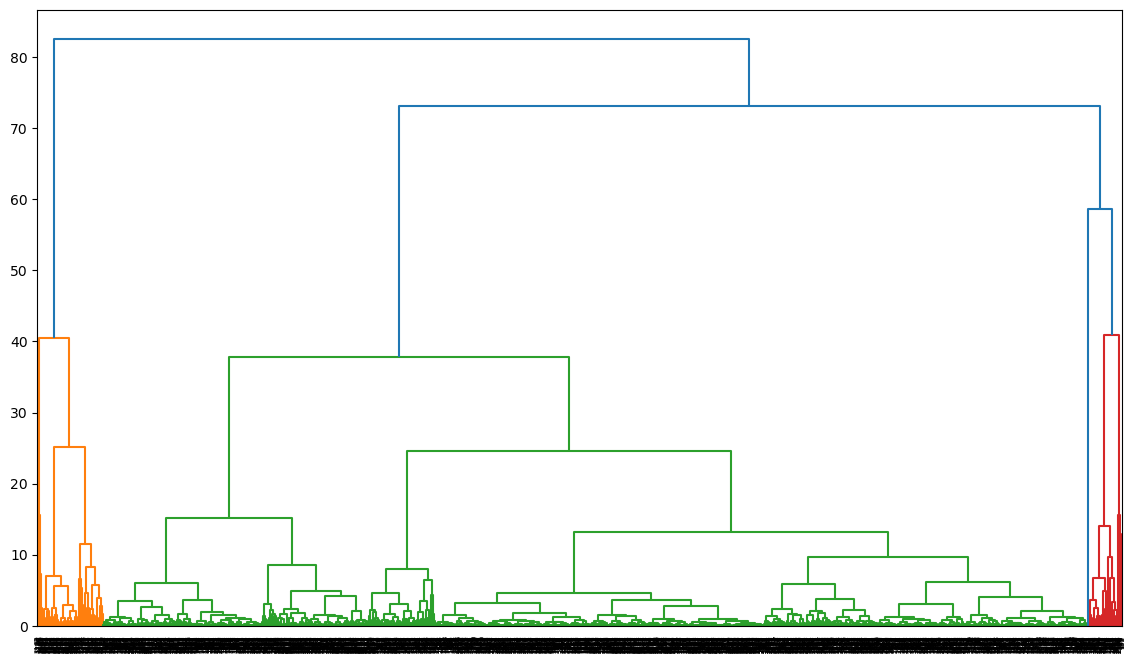

In [15]:
# Hierarchial clustering
energy_ward = linkage(energy_scaled, method = 'ward')

# Plot dendrogram
plt.figure(figsize=(14,8))
dendrogram(energy_ward)
plt.xlabel('County Index')
plt.ylabel('Distance')
plt.show()

### Step 3: Set Up Cluster Interpretation

After determining the optimal number of clusters from the dendrogram, we now assign each county to a cluster using the extracted cluster labels.

To better understand the clustering results, we will:
- Define `num_clusters` as the ideal number of clusters based on the dendrogram created above
- Extract cluster assignment attribute from the hierarchical clustering using `fcluster()` with `criterion = "maxclust"`
- Create a new variable `Cluster` in your cleaned dataframe and assign cluster labels to it
- Compute and print the mean values of the original energy potential features for each cluster.

This summary will help us interpret how counties differ in energy potential across clusters and inform possible next steps for analysis.


In [17]:
# Define ideal number of clusters
num_clusters = 4

# Extract cluseter assignment attributes
cluster_att = fcluster(energy_ward, num_clusters, criterion = 'maxclust')

# New cluster variable
energy['Cluster'] = cluster_att

# Compute and print mean values
cluster_means = energy.groupby('Cluster').mean()
print(f"Mean vlaues of original energy potential features for each cluster: {cluster_means}")

Mean vlaues of original energy potential features for each cluster:          utility_pv_technical_generation_potential_mwh  \
Cluster                                                  
1                                         3.290819e+08   
2                                         4.943040e+07   
3                                         5.948022e+07   
4                                         5.245800e+06   

         residential_pv_technical_generation_potential_mwh  \
Cluster                                                      
1                                             8.433934e+04   
2                                             1.228932e+05   
3                                             2.138205e+06   
4                                             1.462565e+07   

         land_based_wind_technical_generation_potential_mwh  \
Cluster                                                       
1                                             5.422419e+07    
2                    

### Step 4: Visualizing Energy Potential Across Clusters
Now that we have assigned cluster labels, we want to understand how energy potential differs across clusters. To do this, we will visualize these differences using a grouped bar chart.

Each bar should represent the mean value of an energy potential indicator for a specific cluster. These different patterns of potential is what caused the model to segregate the clusters in the way that it did.

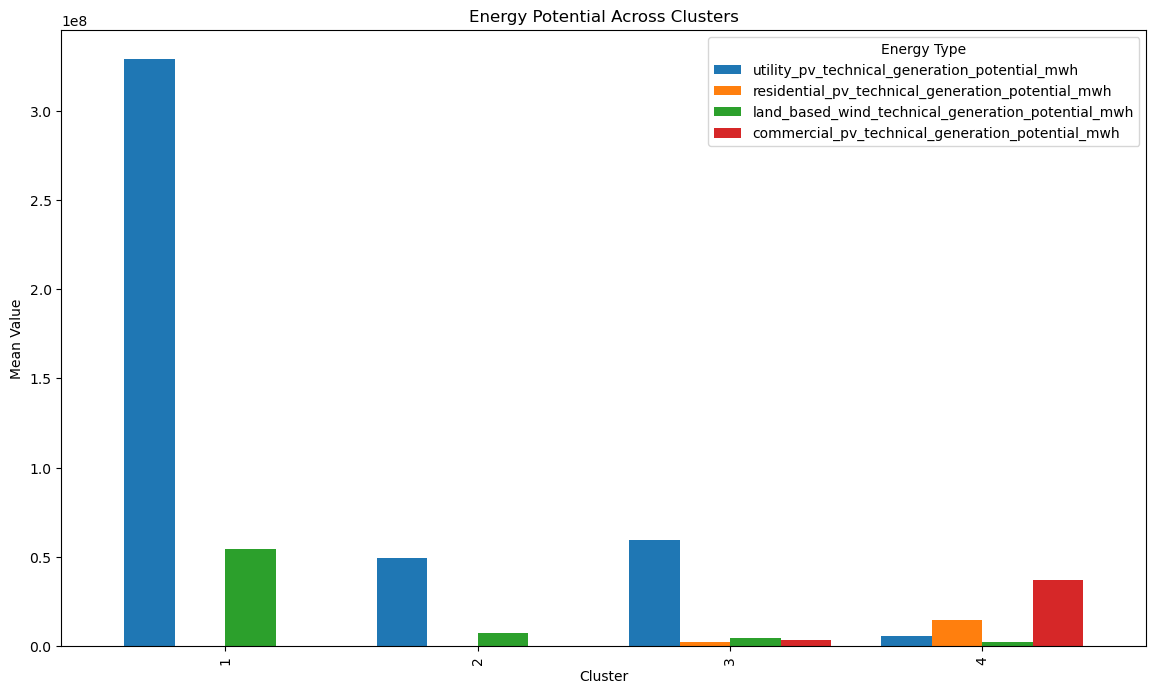

In [19]:
ax = cluster_means.plot(
   kind='bar',
   figsize=(14, 8),
   width=0.8
)

plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.legend(title = 'Energy Type')
plt.title ('Energy Potential Across Clusters')
plt.show()

### Step 5: Interpret Clustering Results
Interpret your plot of the resulting clusters.  How would you characterize and compare the four different clusters in terms of their profile of energy generation?

Cluster one has extremely high potential for utility PV. It also has relatively high values for land based wind energy generation. Cluster 1 likely includes areas in sunny regions with large open spaces. Clusters two and three also have the highest potential in utility PV and relatively low potential for the other 3 energy potentials. Cluster four has the highest potential in commercial PV, then residential PV.

## Part II: Environmental Justice Metrics
Now it's your turn.

So far, we have clustered counties based on **energy potential**, but energy potential alone does not tell the full story of **energy equity and access**. To deepen the analysis, we need to consider environmental justice (EJ) factors that affect communities’ ability to benefit from renewable energy and the environmental burdens they already experience.

1. Explore EJSCREEN variables:  
   - The EJSCREEN subset of our dataset contains metrics on pollution burden, demographics (population size), and health risks (*lines 31-41 of the ColumnsExplained tab in the metadata sheet linked above*).
   - Identify 1-3 variables that could be important for energy equity analysis.  You could introduce them either as clustering features, as post-clustering variables to help interpret the clusters, or both. 

2. Modify the clustering approach:  
   - Add your selected EJSCREEN variables to our feature set.    
   - Re-run the hierarchical clustering analysis with the expanded dataset (if you added any as clustering features).  

3. Interpret the Results:
   Your interpretation could include considerations such as:
   - How do clusters change when EJSCREEN variables are included?  
   - Are counties with high renewable energy potential also burdened by environmental risks?  
   - What policy recommendations might emerge from these findings?  

<function matplotlib.pyplot.show(close=None, block=None)>

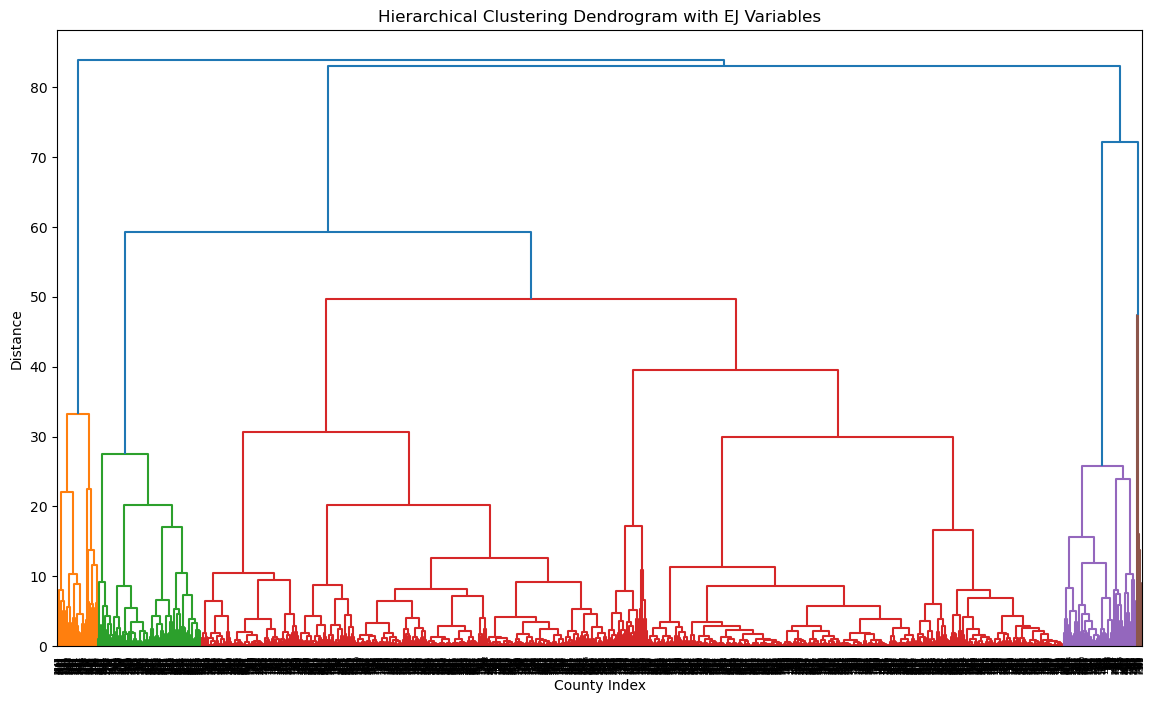

In [21]:
# Choose features
ej_df = eeip_data[[
    'utility_pv_technical_generation_potential_mwh',
    'residential_pv_technical_generation_potential_mwh',
    'land_based_wind_technical_generation_potential_mwh',
    'commercial_pv_technical_generation_potential_mwh',
    'minority_indicator',
    'lowincome_indicator',
    'pm25_5_prop'
]]

# Remove NAs
ej_clean = ej_df.dropna()

# Sclae
scaler = StandardScaler()
ej_scaled = scaler.fit_transform(ej_clean)


# Hierarchial clustering
ej_ward = linkage(ej_scaled, method = 'ward')

# Dendogram
plt.figure(figsize=(14, 8))
dendrogram(ej_ward)
plt.title('Hierarchical Clustering Dendrogram with EJ Variables')
plt.xlabel('County Index')
plt.ylabel('Distance')
plt.show

/tmp/ipykernel_1552239/2093289767.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ej_clean['Cluster'] = cluster_attrs


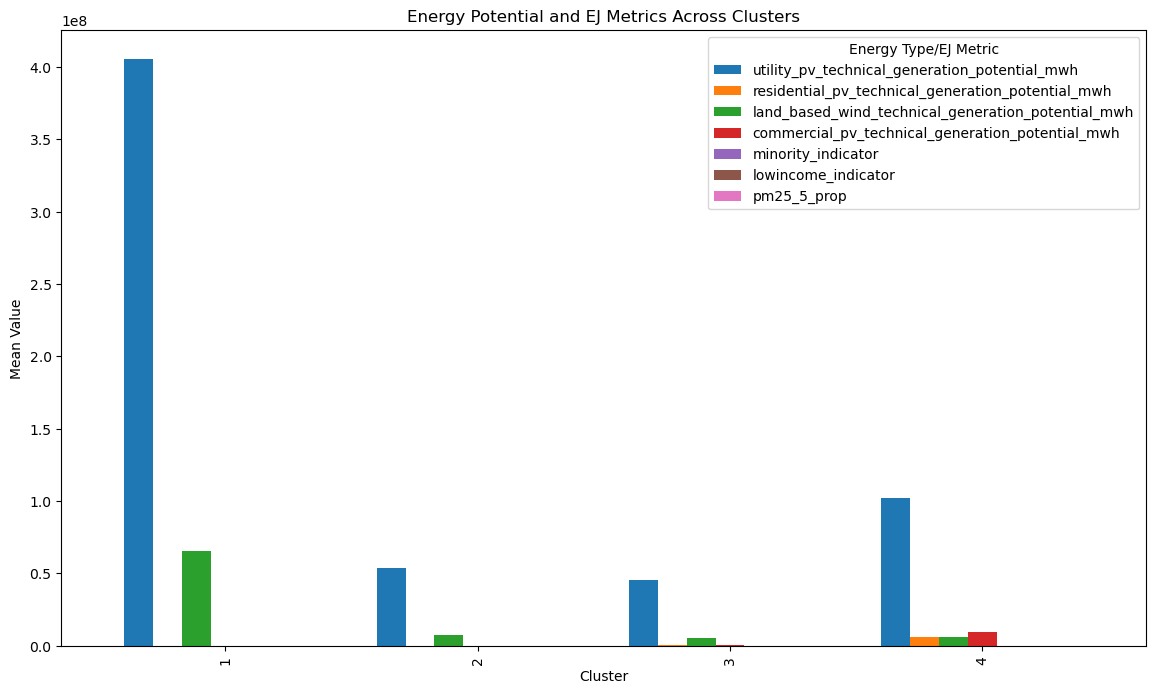

In [23]:
# Clusters based on dendogram
num_clusters = 4

# Extract cluster assignments
cluster_attrs = fcluster(ej_ward, num_clusters, criterion='maxclust')

# Add cluster labels to the dataframe
ej_clean['Cluster'] = cluster_attrs

# Compute mean values for each cluster
cluster_means = ej_clean.groupby('Cluster').mean()

# Visualize the clusters
ax = cluster_means.plot(
   kind='bar',
   figsize=(14, 8),
   width=0.8
)

plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.legend(title = 'Energy Type/EJ Metric')
plt.title ('Energy Potential and EJ Metrics Across Clusters')
plt.show()

The clusters changed, with utility_pv having the highest potential in all clusters now. Adding in the EJSCREEN variables particularly changed cluster 4. It is difficult to tell the environmental burdens in each cluster, due to the large difference in scales. From a policy standpoint, a good recommendation could be creating incentive programes for counties with high energy potential and high environmental justice burdens. These programs could benefit these disadvantaged communities. 

Which EJSCREEN variable(s) did you add to the analysis? Why did you choose these?  What is the question you are interested in? What did you learn from the analysis?

The EJSCREEN variables I used were `minority_indicator`, `lowincome_indicator`, and `pm25_5_prop`. I chose these because the all three relate to different aspects of environmental justice. The `minority_indicator` highlights demographics, the `lowincome_indicator` highlights economics of a community, and `pm25_5_prop` highlights environmental burdens. The question I was interested in was: *How do different environmental justice concerns effect renewable energy potential?*
This analysis did not show much, as the variables have extremely different scales. It highlighted the challenges of combining these variables in an effective way.